# Tabular Data EDA
Anna Mowat

10/27/2024:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
data_dir = os.path.abspath(os.path.join('..', 'data'))
data = pd.read_csv(os.path.join(data_dir,'train.csv'))
data_dict = pd.read_csv(os.path.join(data_dir,'data_dictionary.csv'))


In [4]:
data_dict

Instrument  \
0                           Identifier   
1                         Demographics   
2                         Demographics   
3                         Demographics   
4   Children's Global Assessment Scale   
..                                 ...   
76             Sleep Disturbance Scale   
77             Sleep Disturbance Scale   
78             Sleep Disturbance Scale   
79                        Internet Use   
80                        Internet Use   

                                     Field                       Description  \
0                                       id                  Participant's ID   
1                Basic_Demos-Enroll_Season              Season of enrollment   
2                          Basic_Demos-Age                Age of participant   
3                          Basic_Demos-Sex                Sex of participant   
4                              CGAS-Season           Season of participation   
..                                     ...                               ...   
76                              SDS-Season           Season of participation   
77                       SDS-SDS_Total_Raw                   Total Raw Score   
78                         SDS-SDS_Total_T                     Total T-Score   
79                     PreInt_EduHx-Season           Season of participation   
80  PreInt_EduHx-computerinternet_hoursday  Hours of using computer/internet   

               Type                        Values  \
0               str                           NaN   
1               str  Spring, Summer, Fall, Winter   
2             float                           NaN   
3   categorical int                           0,1   
4               str  Spring, Summer, Fall, Winter   
..              ...                           ...   
76              str  Spring, Summer, Fall, Winter   
77              int                           NaN   
78              int                           NaN   
79              str  Spring, Summer, Fall, Winter   
80  categorical int                       0,1,2,3   

                                         Value Labels  
0                                                 NaN  
1                                                 NaN  
2                                                 NaN  
3                                    0=Male, 1=Female  
4                                                 NaN  
..                                                ...  
76                                                NaN  
77                                                NaN  
78                                                NaN  
79                                                NaN  
80  0=Less than 1h/day, 1=Around 1h/day, 2=Around ...  

[81 rows x 6 columns]

In [5]:
data

id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0     00008ff9                      Fall                5                0   
1     000fd460                    Summer                9                0   
2     00105258                    Summer               10                1   
3     00115b9f                    Winter                9                0   
4     0016bb22                    Spring               18                1   
...        ...                       ...              ...              ...   
3955  ff8a2de4                      Fall               13                0   
3956  ffa9794a                    Winter               10                0   
3957  ffcd4dbd                      Fall               11                0   
3958  ffed1dd5                    Spring               13                0   
3959  ffef538e                    Spring               11                0   

     CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  \
0         Winter             51.0            Fall     16.877316   
1            NaN              NaN            Fall     14.035590   
2           Fall             71.0            Fall     16.648696   
3           Fall             71.0          Summer     18.292347   
4         Summer              NaN             NaN           NaN   
...          ...              ...             ...           ...   
3955      Spring             60.0            Fall     16.362460   
3956         NaN              NaN          Spring     18.764678   
3957      Spring             68.0          Winter     21.441500   
3958      Spring             70.0          Winter     12.235895   
3959         NaN              NaN          Winter           NaN   

      Physical-Height  Physical-Weight  ...  PCIAT-PCIAT_18  PCIAT-PCIAT_19  \
0                46.0             50.8  ...             4.0             2.0   
1                48.0             46.0  ...             0.0             0.0   
2                56.5             75.6  ...             2.0             1.0   
3                56.0             81.6  ...             3.0             4.0   
4                 NaN              NaN  ...             NaN             NaN   
...               ...              ...  ...             ...             ...   
3955             59.5             82.4  ...             1.0             1.0   
3956             53.5             76.4  ...             NaN             NaN   
3957             60.0            109.8  ...             1.0             0.0   
3958             70.7             87.0  ...             1.0             1.0   
3959              NaN              NaN  ...             NaN             NaN   

      PCIAT-PCIAT_20  PCIAT-PCIAT_Total SDS-Season  SDS-SDS_Total_Raw  \
0                4.0               55.0        NaN                NaN   
1                0.0                0.0       Fall               46.0   
2                1.0               28.0       Fall               38.0   
3                1.0               44.0     Summer               31.0   
4                NaN                NaN        NaN                NaN   
...              ...                ...        ...                ...   
3955             0.0               32.0     Winter               35.0   
3956             NaN                NaN        NaN                NaN   
3957             1.0               31.0     Winter               56.0   
3958             1.0               19.0     Spring               33.0   
3959             NaN                NaN        NaN                NaN   

      SDS-SDS_Total_T  PreInt_EduHx-Season  \
0                 NaN                 Fall   
1                64.0               Summer   
2                54.0               Summer   
3                45.0               Winter   
4                 NaN                  NaN   
...               ...                  ...   
3955             50.0                 Fall   
3956              NaN               Winter   
3957             77.0         

In [6]:
# Find duplicates in the 'Name' column
duplicates = data.duplicated(subset=['id'], keep=False)

# Display the duplicate rows
data[duplicates]

Empty DataFrame
Columns: [id, Basic_Demos-Enroll_Season, Basic_Demos-Age, Basic_Demos-Sex, CGAS-Season, CGAS-CGAS_Score, Physical-Season, Physical-BMI, Physical-Height, Physical-Weight, Physical-Waist_Circumference, Physical-Diastolic_BP, Physical-HeartRate, Physical-Systolic_BP, Fitness_Endurance-Season, Fitness_Endurance-Max_Stage, Fitness_Endurance-Time_Mins, Fitness_Endurance-Time_Sec, FGC-Season, FGC-FGC_CU, FGC-FGC_CU_Zone, FGC-FGC_GSND, FGC-FGC_GSND_Zone, FGC-FGC_GSD, FGC-FGC_GSD_Zone, FGC-FGC_PU, FGC-FGC_PU_Zone, FGC-FGC_SRL, FGC-FGC_SRL_Zone, FGC-FGC_SRR, FGC-FGC_SRR_Zone, FGC-FGC_TL, FGC-FGC_TL_Zone, BIA-Season, BIA-BIA_Activity_Level_num, BIA-BIA_BMC, BIA-BIA_BMI, BIA-BIA_BMR, BIA-BIA_DEE, BIA-BIA_ECW, BIA-BIA_FFM, BIA-BIA_FFMI, BIA-BIA_FMI, BIA-BIA_Fat, BIA-BIA_Frame_num, BIA-BIA_ICW, BIA-BIA_LDM, BIA-BIA_LST, BIA-BIA_SMM, BIA-BIA_TBW, PAQ_A-Season, PAQ_A-PAQ_A_Total, PAQ_C-Season, PAQ_C-PAQ_C_Total, PCIAT-Season, PCIAT-PCIAT_01, PCIAT-PCIAT_02, PCIAT-PCIAT_03, PCIAT-PCIAT_04, PCIAT-PCIAT_05, PCIAT-PCIAT_06, PCIAT-PCIAT_07, PCIAT-PCIAT_08, PCIAT-PCIAT_09, PCIAT-PCIAT_10, PCIAT-PCIAT_11, PCIAT-PCIAT_12, PCIAT-PCIAT_13, PCIAT-PCIAT_14, PCIAT-PCIAT_15, PCIAT-PCIAT_16, PCIAT-PCIAT_17, PCIAT-PCIAT_18, PCIAT-PCIAT_19, PCIAT-PCIAT_20, PCIAT-PCIAT_Total, SDS-Season, SDS-SDS_Total_Raw, SDS-SDS_Total_T, PreInt_EduHx-Season, PreInt_EduHx-computerinternet_hoursday, sii]
Index: []

[0 rows x 82 columns]

### Data Sparsity

In [7]:
is_missing = data.isna().to_numpy()
is_missing

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True]])

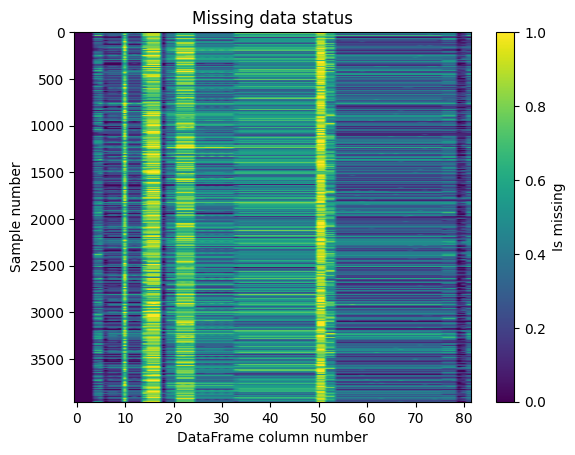

In [8]:
fig,ax = plt.subplots(1,1)
img = ax.imshow(is_missing,aspect='auto')
ax.set_xlabel('DataFrame column number')
ax.set_ylabel('Sample number')
ax.set_title('Missing data status')
cbar = plt.colorbar(img,ax=ax)
cbar.set_label('Is missing')
plt.show()

In [9]:
# Calculate missing data counts for each column
missing_data = data.isnull().sum()

# Print columns with their missing data counts
for column, count in missing_data.items():
    if round((count/data.shape[0])*100,0) >= 50:
        print(f"{column}: {round((count/data.shape[0])*100,0)}% missing values")

Physical-Waist_Circumference: 77.0% missing values
Fitness_Endurance-Season: 67.0% missing values
Fitness_Endurance-Max_Stage: 81.0% missing values
Fitness_Endurance-Time_Mins: 81.0% missing values
Fitness_Endurance-Time_Sec: 81.0% missing values
FGC-FGC_GSND: 73.0% missing values
FGC-FGC_GSND_Zone: 73.0% missing values
FGC-FGC_GSD: 73.0% missing values
FGC-FGC_GSD_Zone: 73.0% missing values
BIA-BIA_Activity_Level_num: 50.0% missing values
BIA-BIA_BMC: 50.0% missing values
BIA-BIA_BMI: 50.0% missing values
BIA-BIA_BMR: 50.0% missing values
BIA-BIA_DEE: 50.0% missing values
BIA-BIA_ECW: 50.0% missing values
BIA-BIA_FFM: 50.0% missing values
BIA-BIA_FFMI: 50.0% missing values
BIA-BIA_FMI: 50.0% missing values
BIA-BIA_Fat: 50.0% missing values
BIA-BIA_Frame_num: 50.0% missing values
BIA-BIA_ICW: 50.0% missing values
BIA-BIA_LDM: 50.0% missing values
BIA-BIA_LST: 50.0% missing values
BIA-BIA_SMM: 50.0% missing values
BIA-BIA_TBW: 50.0% missing values
PAQ_A-Season: 88.0% missing values
PAQ_

Takeaway: Lots of missing values! It also looks like there are groups of features that are missing/present. This makes sense from the data dictionary. It seems to be a compilation of many measurement methods, so each sample has the features corresponding to the measurements that were performed on that subject, and missing the others.

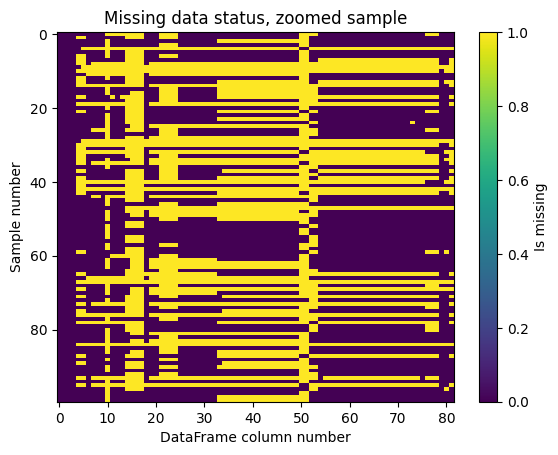

In [10]:
fig,ax = plt.subplots(1,1)
img = ax.imshow(is_missing[:100,:],aspect='auto')
ax.set_xlabel('DataFrame column number')
ax.set_ylabel('Sample number')
ax.set_title('Missing data status, zoomed sample')
cbar = plt.colorbar(img,ax=ax)
cbar.set_label('Is missing')
plt.show()

In [11]:
data.shape

(3960, 82)

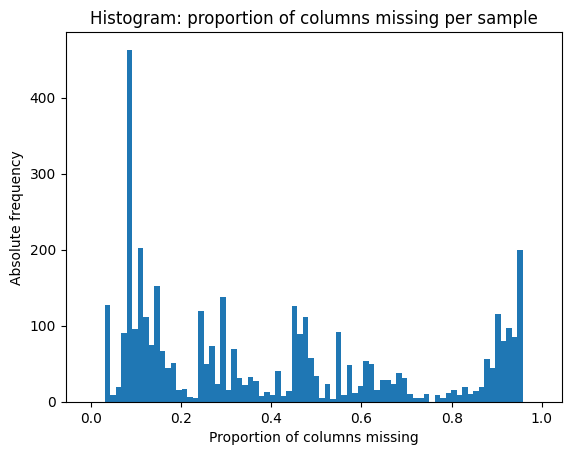

Minimum number of missing columns: 3


In [12]:
fig,ax = plt.subplots(1,1)
ax.hist(np.mean(is_missing,axis=1),bins=(np.arange(data.shape[1]+1)-0.5)/data.shape[1])
ax.set_xlabel('Proportion of columns missing')
ax.set_ylabel('Absolute frequency')
ax.set_title('Histogram: proportion of columns missing per sample')
plt.show()
print('Minimum number of missing columns:',np.min(np.sum(is_missing,axis=1)))

Takeaway: All samples are missing at least 3 columns; many are missing a vast majority of the columns.

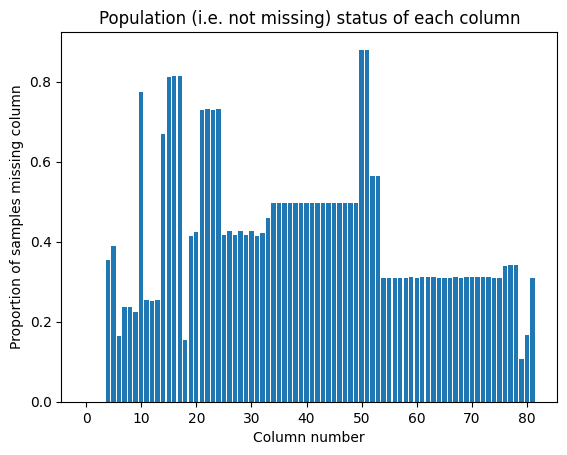

In [13]:
fig,ax = plt.subplots(1,1)
y = np.mean(is_missing,axis=0)
x = range(data.shape[1])
ax.bar(x,y)
ax.set_title('Population (i.e. not missing) status of each column')
ax.set_ylabel('Proportion of samples missing column')
ax.set_xlabel('Column number')
plt.show()

Takeaway: Some features are missing for most samples--might think about throwing these out. Many of the features are missing in at least a quarter of all samples.

#### Summary

Imputation/filtering/filling will be a huge component of preprocessing, since the data is so sparse. A few initial thoughts:
* Remove features that are missing for most samples
* Remove samples that are missing most features
* KNN approach to fill in missing feature groups? e.g. maybe children with similar "Physical Measures" will also have similar "BIA". So for samples missing BIA data, use KNN to find samples with similar Physical Measures, and use their BIA data to fill in BIA
* Whatever the approach, need to think of a reasonable way to apply it to the test data during inference

### Feature Groups

Pairplot will be overwhelming for so many features, so let's look at groups of features that come from different measurement approaches.

In [14]:
cols = list(data.columns)
col_groups = {}

In [15]:
season_dict = {'Winter':0,'Spring':1,'Summer':2,'Fall':3}
for col in cols:
    if 'Season' in col:
        data[col] = data[col].map(season_dict)


In [16]:
# demographic features
col_groups["Basic_Demos"] = [col for col in cols if 'Basic_Demos' in col]
col_groups["Basic_Demos"].append("sii")
print("Demographics:",col_groups["Basic_Demos"])

# Children's Global Assessment Scale
col_groups["CGAS"] = [col for col in cols if 'CGAS' in col]
col_groups["CGAS"].append("sii")
print("\nChildren's Global Assessment Scale:",col_groups["CGAS"])

# physical measures
col_groups["Physical"] = [col for col in cols if 'Physical' in col]
col_groups["Physical"].append("sii")
print("\nPhysical Measures:",col_groups["Physical"])

# FitnessGram vitals and treadmill
col_groups["Fitness_Endurance"] = [col for col in cols if 'Fitness_Endurance' in col]
col_groups["Fitness_Endurance"].append("sii")
print("\nFitnessGram Vitals and Treadmill:",col_groups["Fitness_Endurance"])

# FitnessGram Child
col_groups["FGC"] = [col for col in cols if 'FGC' in col]
col_groups["FGC"].append("sii")
print("\nFitnessGram Child:",col_groups["FGC"])

# bio-electric impedance analysis
col_groups["BIA"] = [col for col in cols if 'BIA' in col]
col_groups["BIA"].append("sii")
print("\nBio-electric Impedance Analysis:",col_groups["BIA"])

# physical activity questionnaire
col_groups["PAQ"] = [col for col in cols if 'PAQ' in col]
col_groups["PAQ"].append("sii")
print("\nPhysical Activity Questionnaire:",col_groups["PAQ"])

# parent-child internet addiction test
col_groups["PCIAT"] = [col for col in cols if 'PCIAT' in col]
col_groups["PCIAT"].append("sii")
print("\nParent-Child Internet Addiciton Test:",col_groups["PCIAT"])

# sleep disturbance scale
col_groups["SDS"] = [col for col in cols if 'SDS' in col]
col_groups["SDS"].append("sii")
print("\nSleep Disturbance Scale:",col_groups["SDS"])

# internet use
col_groups["PreInt"] = [col for col in cols if 'PreInt' in col]
col_groups["SDS"].append("sii")
print("\nInternet Use:",col_groups["PreInt"])

Demographics: ['Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex', 'sii']

Children's Global Assessment Scale: ['CGAS-Season', 'CGAS-CGAS_Score', 'sii']

Physical Measures: ['Physical-Season', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'sii']

FitnessGram Vitals and Treadmill: ['Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'sii']

FitnessGram Child: ['FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'sii']

Bio-electric Impedance Analysis: ['BIA-Season', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI

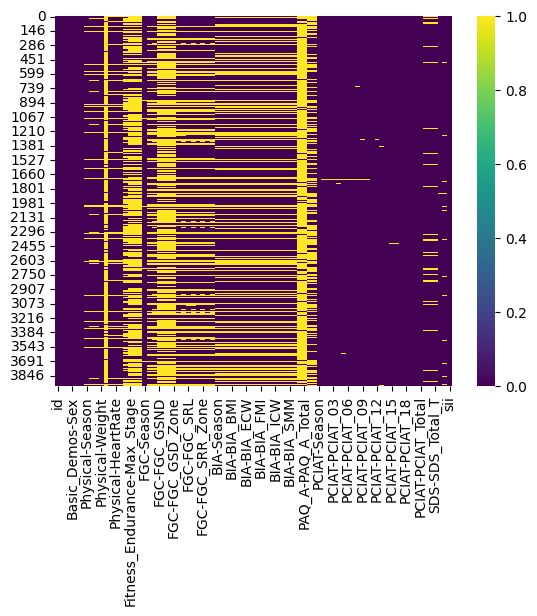

In [17]:
# Find rows where both 'A' and 'B' are not null
subset_not_null = data[col_groups["CGAS"]].notnull().all(axis=1)

# Filter the DataFrame
result = data[subset_not_null]

sns.heatmap(result.isnull(), cbar=True, cmap='viridis')
#plt.legend() 
plt.show()

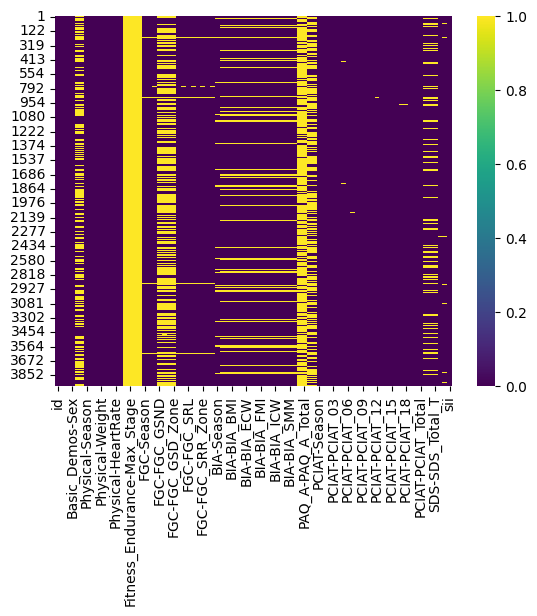

In [18]:
# Find rows where both 'A' and 'B' are not null
subset_not_null = data[col_groups["Physical"]].notnull().all(axis=1)

# Filter the DataFrame
result = data[subset_not_null]

sns.heatmap(result.isnull(), cbar=True, cmap='viridis')
#plt.legend() 
plt.show()

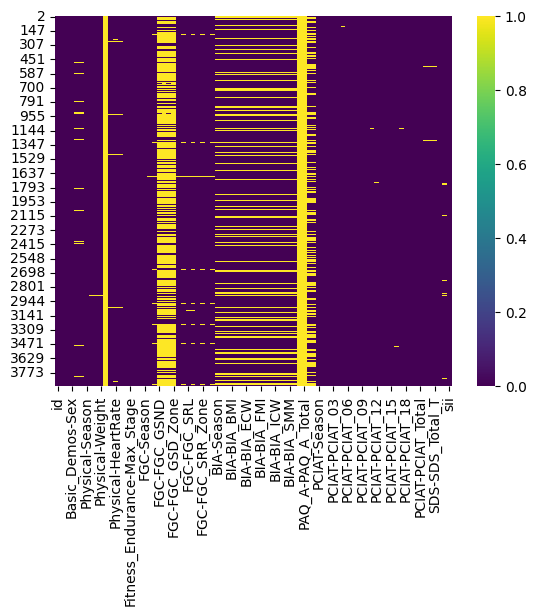

In [19]:
# Find rows where both 'A' and 'B' are not null
subset_not_null = data[col_groups["Fitness_Endurance"]].notnull().all(axis=1)

# Filter the DataFrame
result = data[subset_not_null]

sns.heatmap(result.isnull(), cbar=True, cmap='viridis')
#plt.legend() 
plt.show()

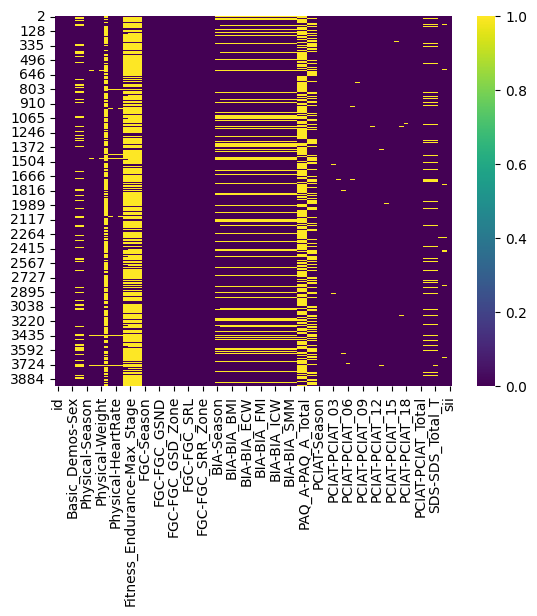

In [20]:
# Find rows where both 'A' and 'B' are not null
subset_not_null = data[col_groups["FGC"]].notnull().all(axis=1)

# Filter the DataFrame
result = data[subset_not_null]

sns.heatmap(result.isnull(), cbar=True, cmap='viridis')
#plt.legend() 
plt.show()

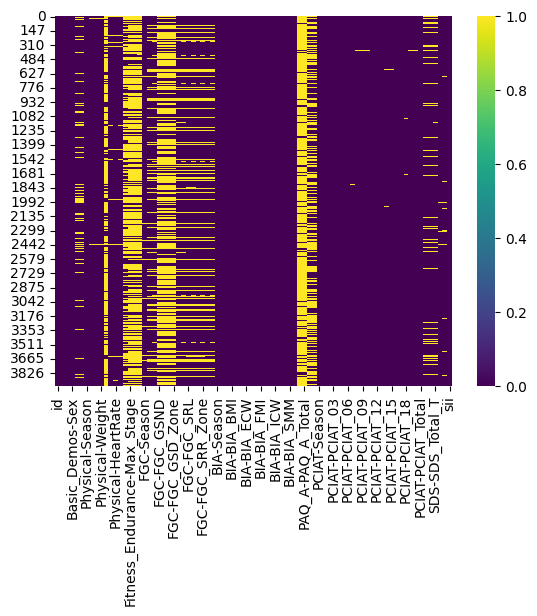

In [21]:
# Find rows where both 'A' and 'B' are not null
subset_not_null = data[col_groups["BIA"]].notnull().all(axis=1)

# Filter the DataFrame
result = data[subset_not_null]

sns.heatmap(result.isnull(), cbar=True, cmap='viridis')
#plt.legend() 
plt.show()

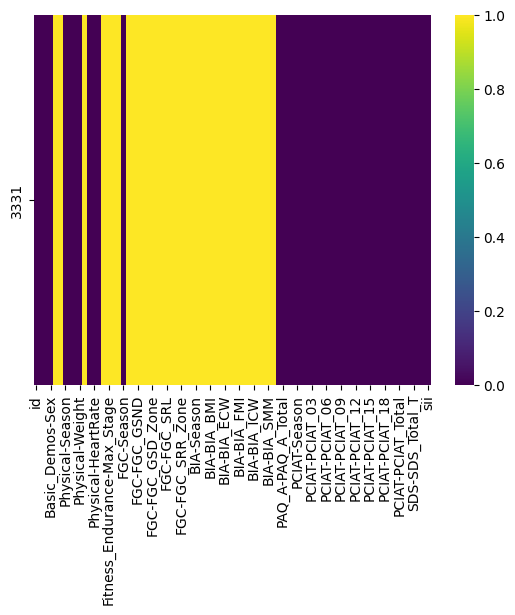

In [22]:
# Find rows where both 'A' and 'B' are not null
subset_not_null = data[col_groups["PAQ"]].notnull().all(axis=1)

# Filter the DataFrame
result = data[subset_not_null]

sns.heatmap(result.isnull(), cbar=True, cmap='viridis')
#plt.legend() 
plt.show()

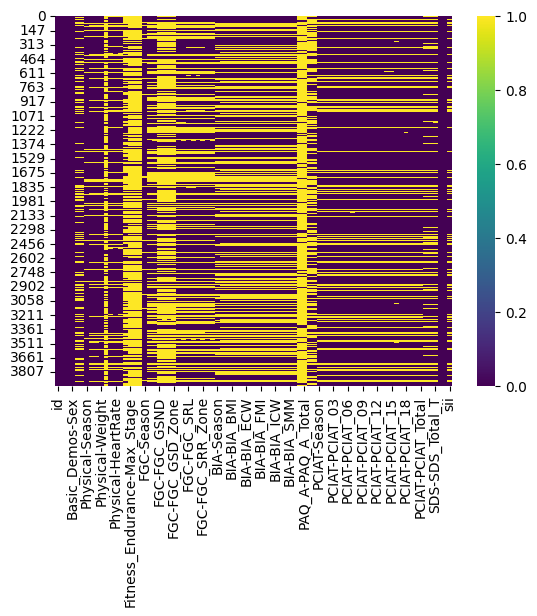

In [23]:
# Find rows where both 'A' and 'B' are not null
subset_not_null = data[col_groups["PreInt"]].notnull().all(axis=1)

# Filter the DataFrame
result = data[subset_not_null]

sns.heatmap(result.isnull(), cbar=True, cmap='viridis')
#plt.legend() 
plt.show()

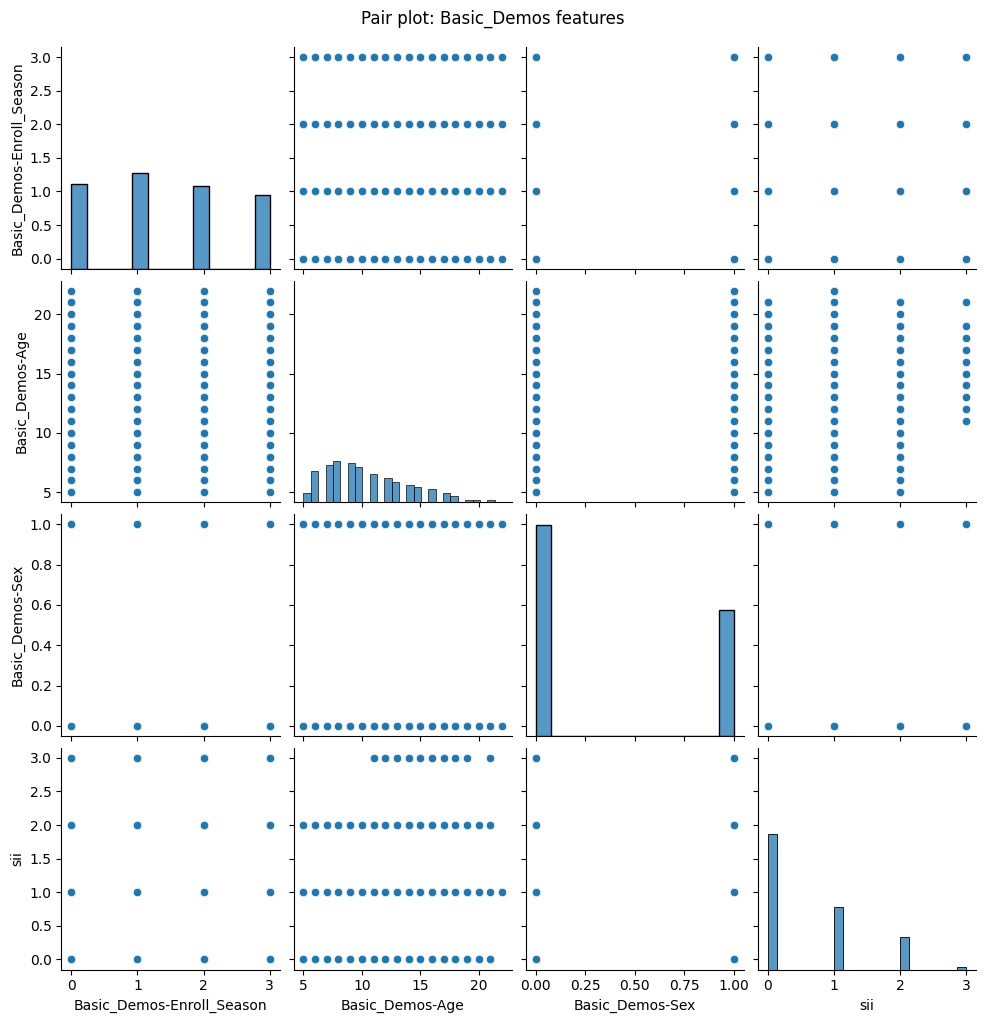

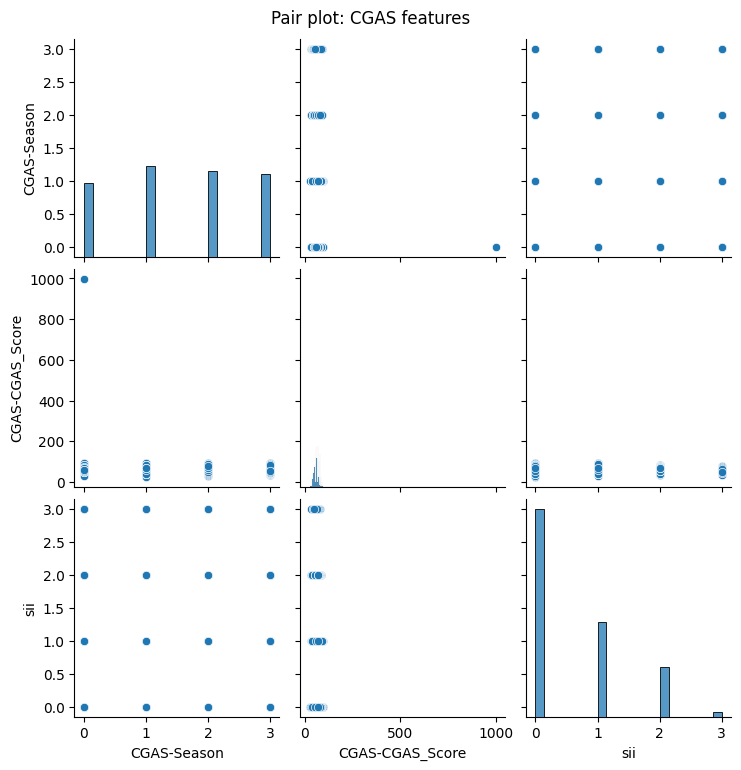

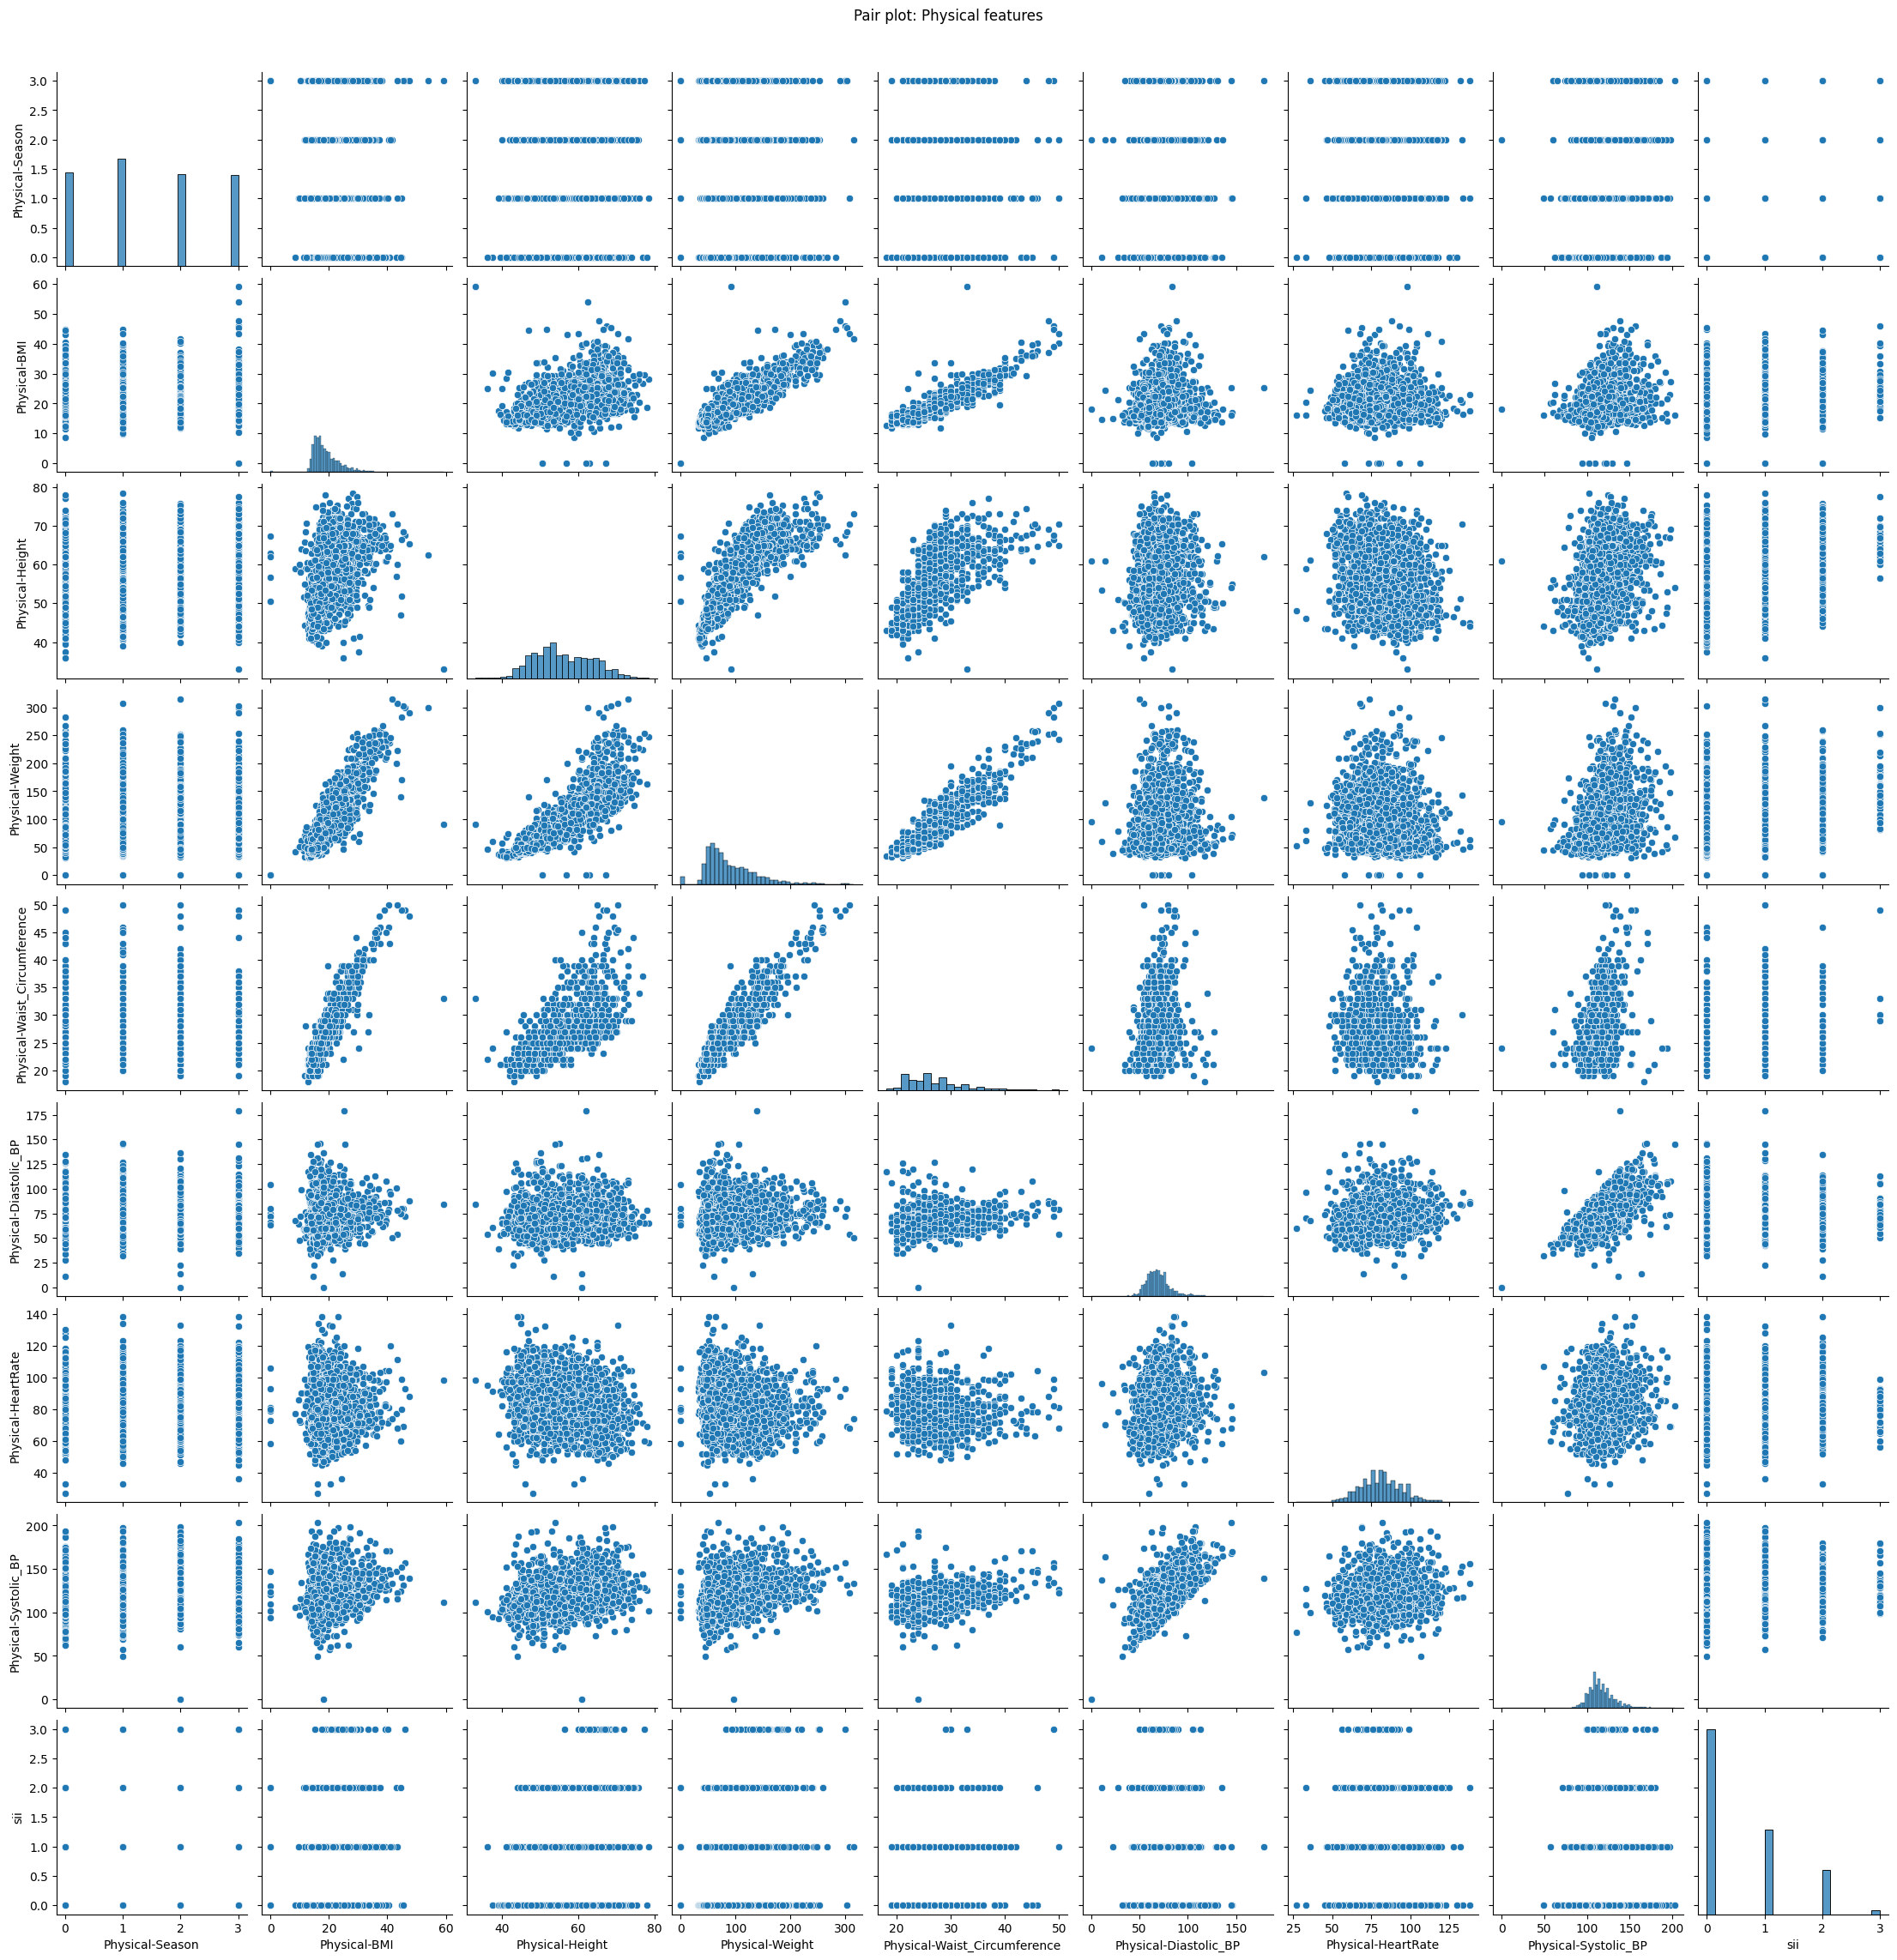

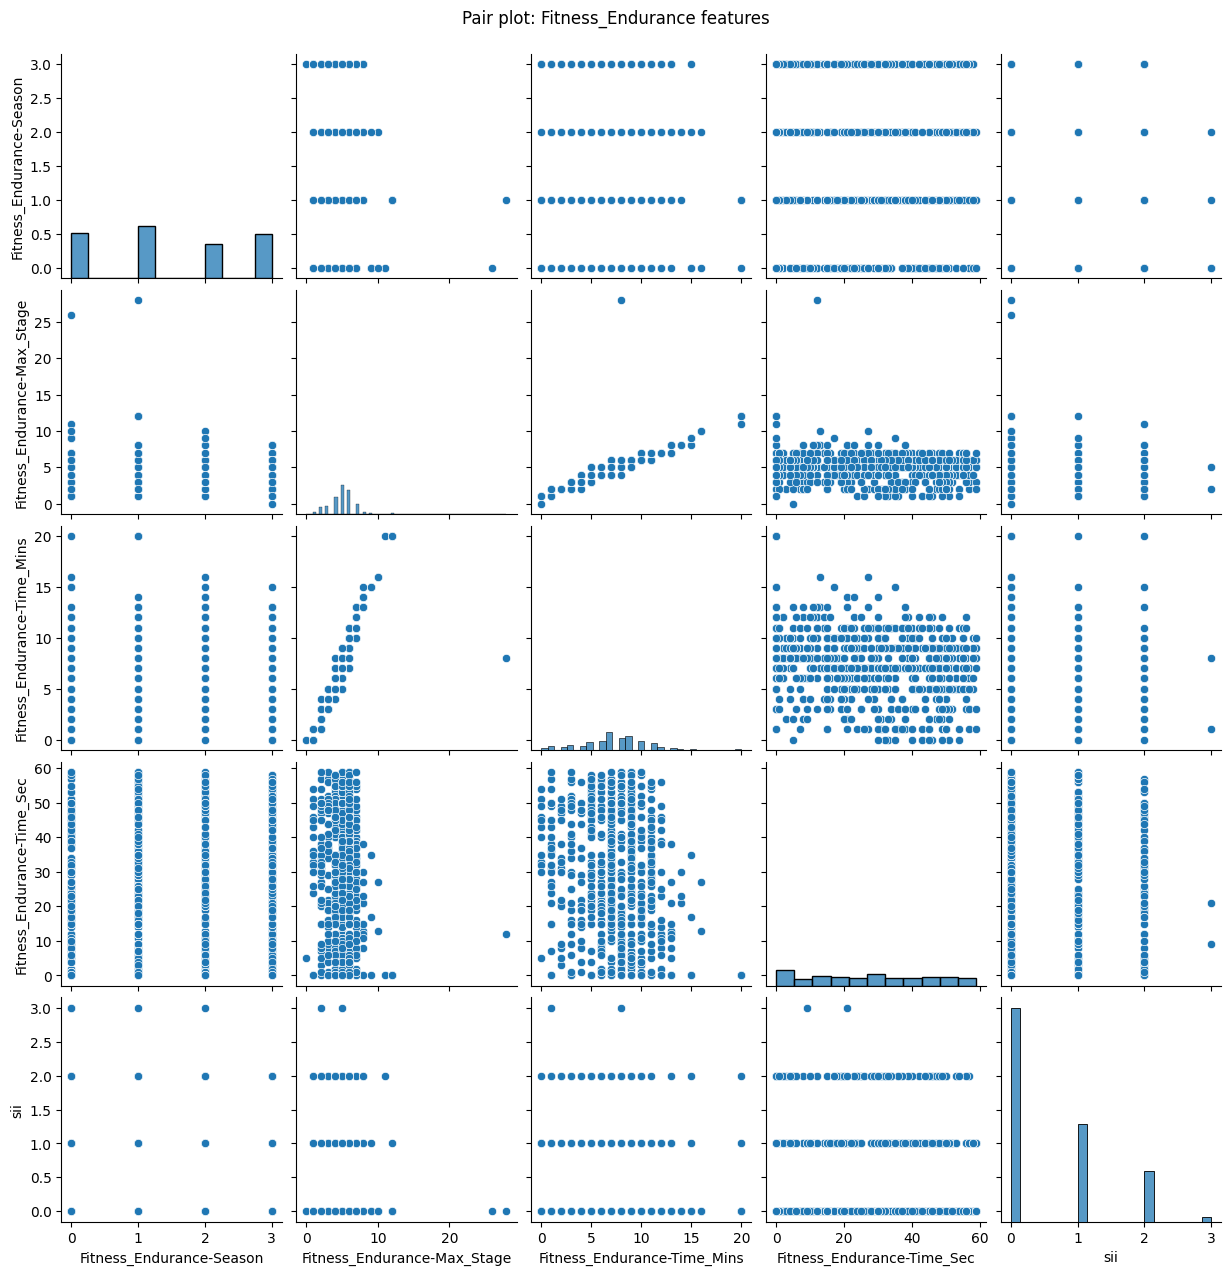

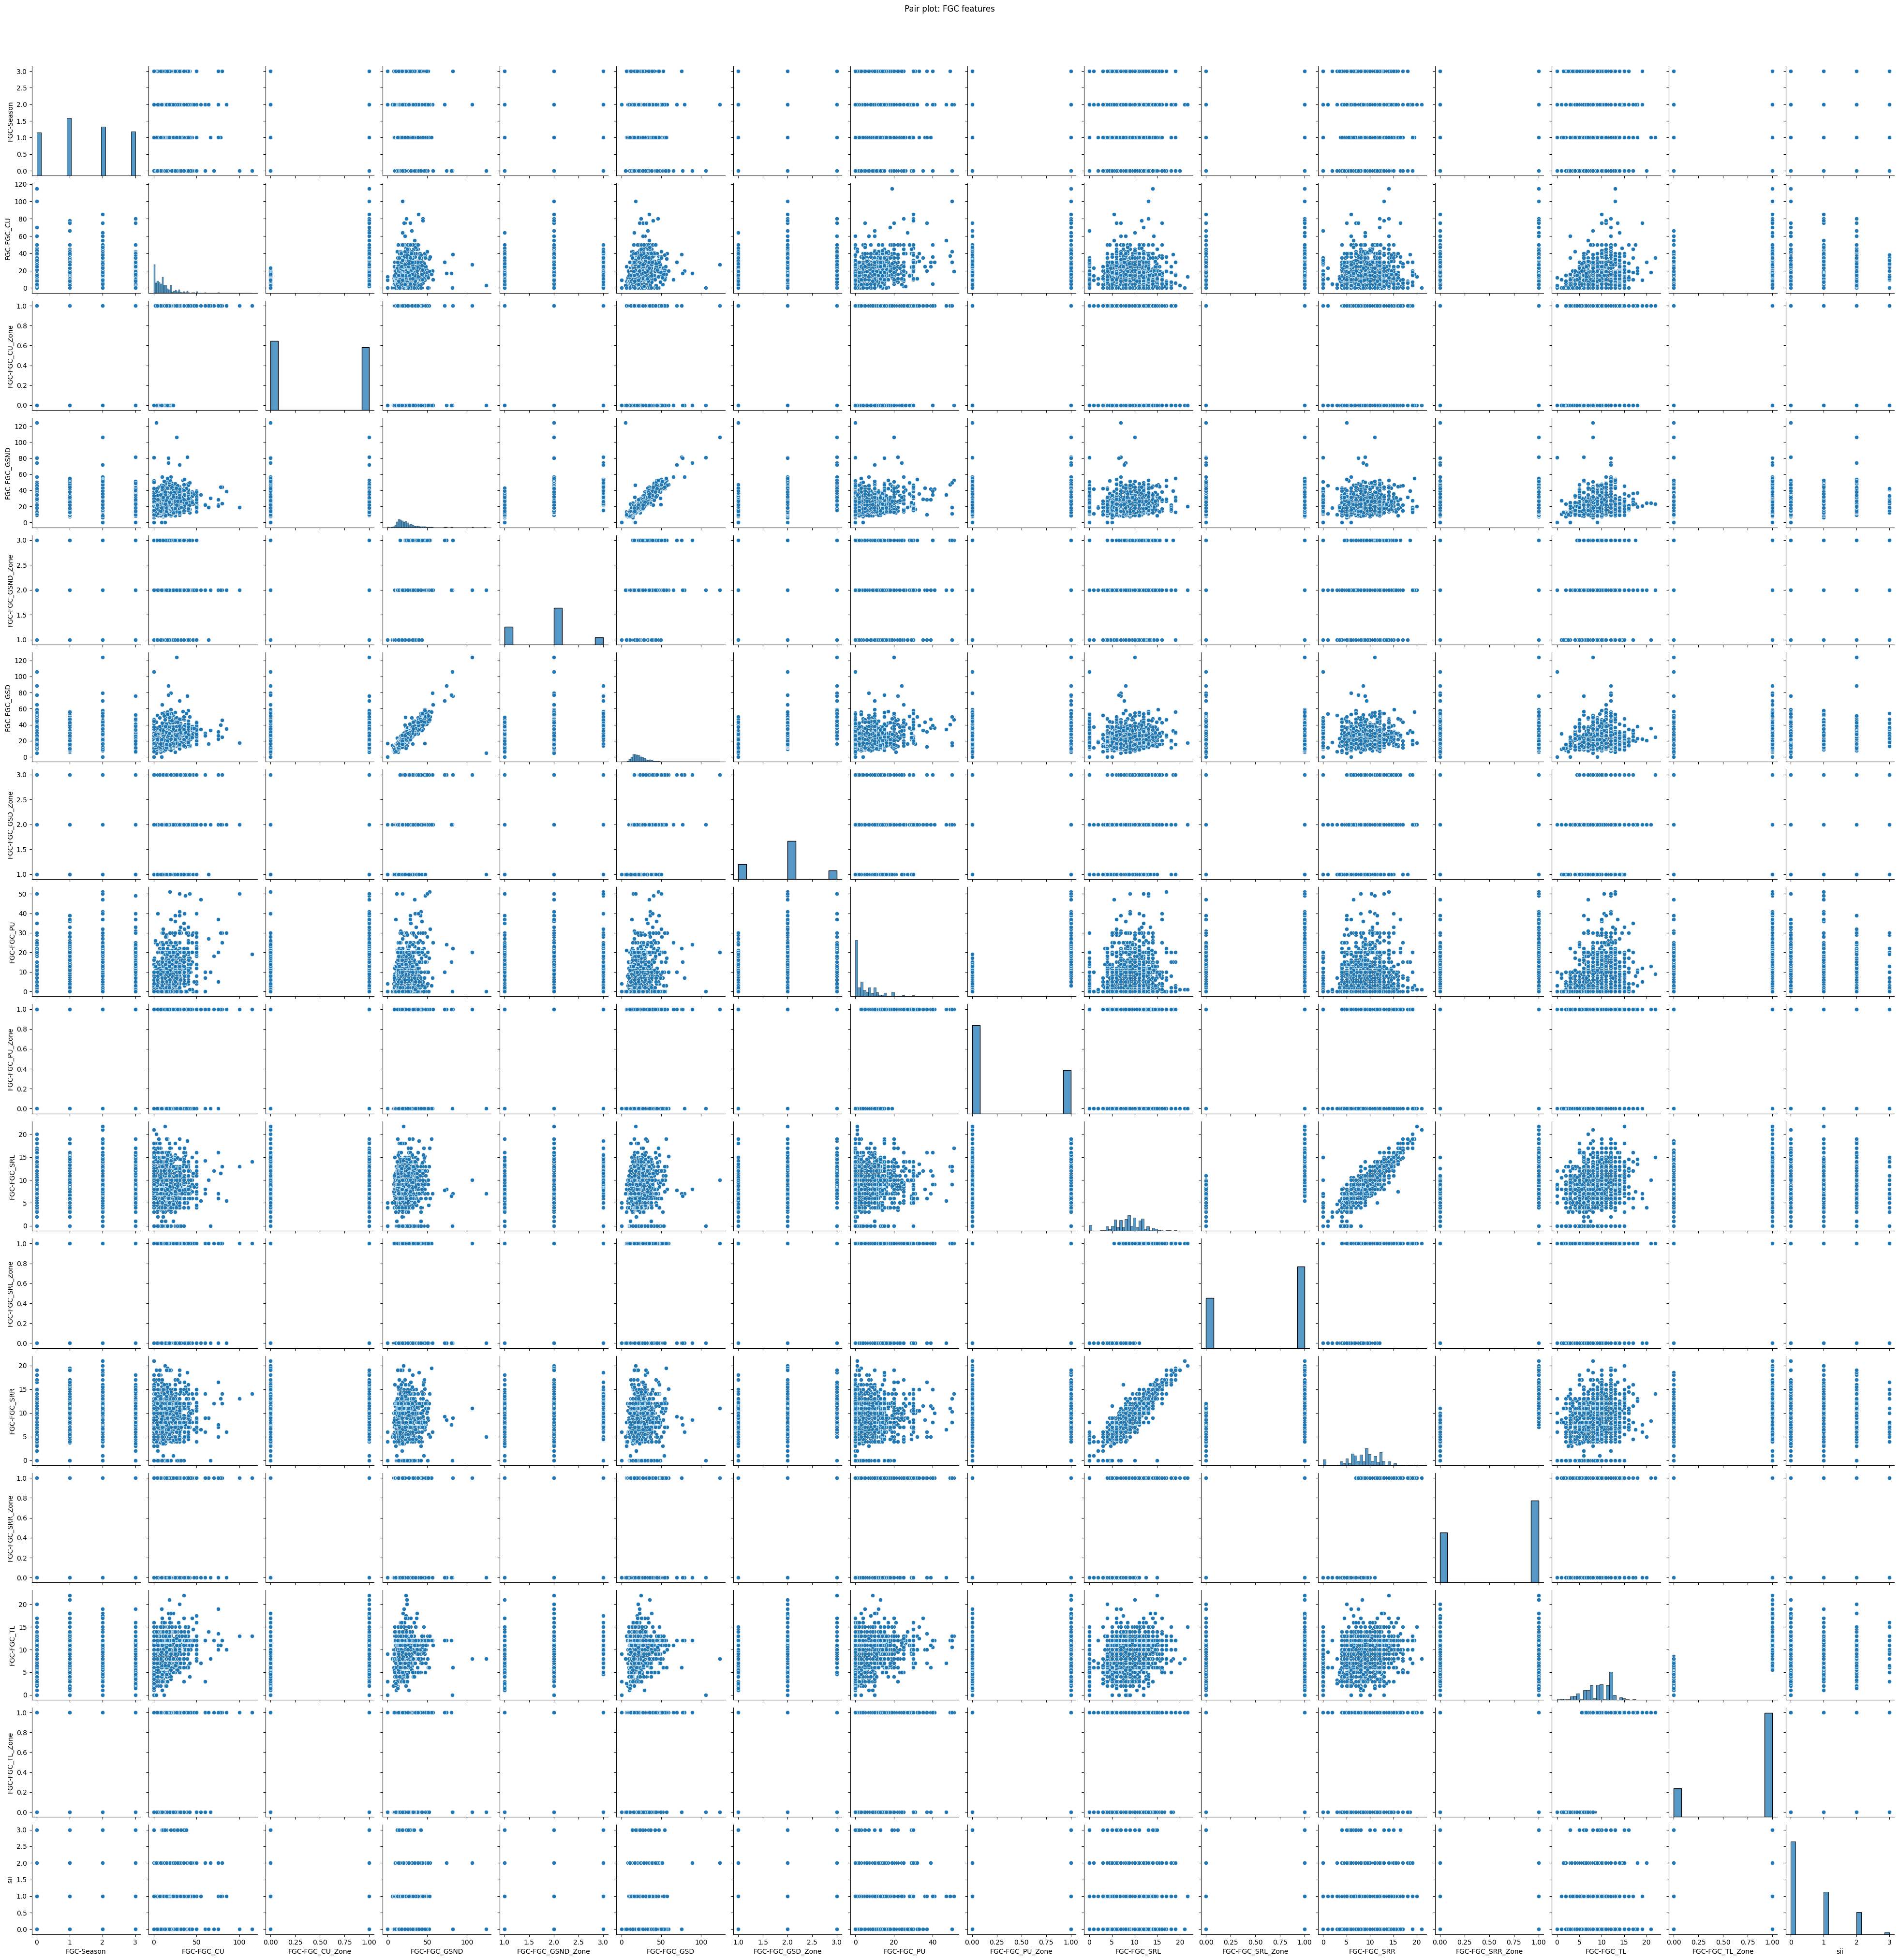

In [24]:
for k,v in col_groups.items():
    tmp = data.loc[:,v]
    pp = sns.pairplot(tmp)
    pp.fig.suptitle('Pair plot: '+ k + ' features', y=1.02)
    plt.show()
